# IBM Data Science Capstone Project

**The project focuses on the neighbourhoods and boroughs in New York City and aims to solve the problem of selecting an appropriate neighbourhood for opening a Chinese restaurant.**

I've utilized word clouds on the cuisine data of NYC obtained from wikipedia to understand the spread of cuisines. I utilized the results of the word cloud to select a location in NYC and implemented K-means clustering in that region.  

In [1]:
#Importing the required libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from PIL import Image # converting images into arrays

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Libraries imported.
Matplotlib version:  3.0.2


In [2]:
#Importing the word cloud library

from wordcloud import WordCloud, STOPWORDS

## Exploring the cuisine dataset

In [3]:
cuisine=pd.read_csv('Restaurant_Grades.csv')

In [4]:
cuisine.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE
0,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,6,A,06/11/2019,08/13/2019
1,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Plumbing not properly installed or maintained;...,N,6,A,06/11/2019,08/13/2019
2,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,6,A,06/11/2019,08/13/2019
3,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Pesticide use not in accordance with label or ...,N,5,A,05/11/2018,08/13/2019
4,MORRIS PARK BAKE SHOP,Bronx,1007,MORRIS PARK AVE,10462.0,Bakery,Non-food contact surface improperly constructe...,N,5,A,05/11/2018,08/13/2019


In [6]:
bor_cuisine=cuisine[['BORO', 'CUISINE DESCRIPTION']]

In [7]:
type(bor_cuisine)

pandas.core.frame.DataFrame

In [9]:
bor_cuisine.head()

,BORO,CUISINE DESCRIPTION
0,Bronx,Bakery
1,Bronx,Bakery
2,Bronx,Bakery
3,Bronx,Bakery
4,Bronx,Bakery


In [10]:
bor_cuisine['BORO'].value_counts()

Manhattan        76389
Brooklyn         48689
Queens           44702
Bronx            18154
Staten Island     6675
0                   54
Name: BORO, dtype: int64

In [9]:
bor_cuisine['CUISINE DESCRIPTION'].value_counts()

American                                                            43124
Chinese                                                             19892
Café/Coffee/Tea                                                     10510
Pizza                                                                8712
Italian                                                              7787
Latin (Cuban, Dominican, Puerto Rican, South & Central American)     7687
Mexican                                                              7540
Japanese                                                             6637
Bakery                                                               6199
Caribbean                                                            6180
Spanish                                                              5493
Pizza/Italian                                                        4081
Chicken                                                              3704
Donuts                                

#### Exploring cuisines in Manhattan

In [66]:
Man_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Manhattan']
Cuisine_M=Man_cuisine[['CUISINE DESCRIPTION']]
Cuisine_M.head()

,CUISINE DESCRIPTION
21,Irish
22,Irish
23,Irish
24,Irish
25,Irish


In [12]:
Cuisine_M.to_csv('CUISINE_M.txt', sep=',', index=False)

In [13]:
Cuisine_M1 = open('CUISINE_M.txt', 'r').read()

In [14]:
stopwords = set(STOPWORDS)

In [15]:
NYC_CUISINE_Man = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Man.generate(Cuisine_M1)

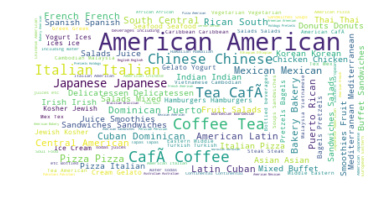

<Figure size 3240x3960 with 0 Axes>

In [16]:
plt.imshow(NYC_CUISINE_Man, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Brooklyn 

In [67]:
Brook_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Brooklyn']
Cuisine_B=Brook_cuisine[['CUISINE DESCRIPTION']]
Cuisine_B.head()

,CUISINE DESCRIPTION
7,Hamburgers
8,Hamburgers
9,Hamburgers
10,Hamburgers
11,Hamburgers


In [18]:
Cuisine_B.to_csv('CUISINE_B.txt', sep=',', index=False)

In [19]:
Cuisine_B1 = open('CUISINE_B.txt', 'r').read()

In [20]:
NYC_CUISINE_B = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_B.generate(Cuisine_B1)

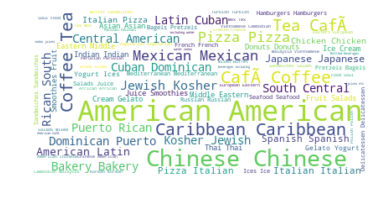

<Figure size 3240x3960 with 0 Axes>

In [21]:
plt.imshow(NYC_CUISINE_B, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines in Bronx

In [68]:
Bronx_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Bronx']
Cuisine_Br=Bronx_cuisine[['CUISINE DESCRIPTION']]
Cuisine_Br.head()

,CUISINE DESCRIPTION
0,Bakery
1,Bakery
2,Bakery
3,Bakery
4,Bakery


In [23]:
Cuisine_Br.to_csv('CUISINE_Br.txt', sep=',', index=False)
Cuisine_Br1 = open('CUISINE_Br.txt', 'r').read()

NYC_CUISINE_Br = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_Br.generate(Cuisine_Br1)

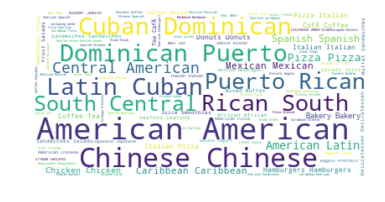

<Figure size 3240x3960 with 0 Axes>

In [24]:
plt.imshow(NYC_CUISINE_Br, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

#### Exploring cuisines on Staten Island

In [69]:
staten_island_cuisine=bor_cuisine[bor_cuisine['BORO'] == 'Staten Island']
Cuisine_stat=staten_island_cuisine[['CUISINE DESCRIPTION']]
Cuisine_stat.head()

,CUISINE DESCRIPTION
201,Delicatessen
202,Delicatessen
203,Delicatessen
204,Delicatessen
205,Delicatessen


In [26]:
Cuisine_stat.to_csv('CUISINE_stat.txt', sep=',', index=False)
Cuisine_stat1 = open('CUISINE_stat.txt', 'r').read()

NYC_CUISINE_stat = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
NYC_CUISINE_stat.generate(Cuisine_stat1)

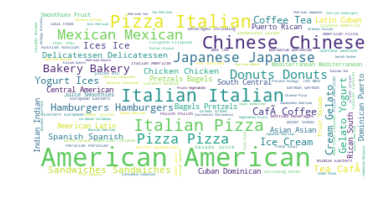

<Figure size 3240x3960 with 0 Axes>

In [27]:
plt.imshow(NYC_CUISINE_stat, interpolation='bilinear')
plt.axis('off')

fig = plt.figure()
fig.set_figwidth(45)
fig.set_figheight(55)

plt.show()

**The above word clouds show that the most popular cuisine in New York in American. In case of Chinese cuisine, Bronx has more chinese restaurants than any other city in the NYC region. Thus, exploring Bronx makes sense.**


In [13]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [14]:
newyork_data

{'type': 'FeatureCollection',
 'totalFeatures': 306,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34572.1',
   'geometry': {'type': 'Point',
    'coordinates': [-73.84720052054902, 40.89470517661]},
   'geometry_name': 'geom',
   'properties': {'name': 'Wakefield',
    'stacked': 1,
    'annoline1': 'Wakefield',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.84720052054902,
     40.89470517661,
     -73.84720052054902,
     40.89470517661]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.2',
   'geometry': {'type': 'Point',
    'coordinates': [-73.82993910812398, 40.87429419303012]},
   'geometry_name': 'geom',
   'properties': {'name': 'Co-op City',
    'stacked': 2,
    'annoline1': 'Co-op',
    'annoline2': 'City',
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Bronx',
    'bbox': [-73.82993910812398,
     40.87429419303012,
     -73.82993910812398,
     40.87429419303012]}},
  {'type': 'Feature',
 

In [18]:
neighborhoods_data = newyork_data['features']

In [19]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [15]:
#Creating an empty dataframe for NYC
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiating the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [16]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [20]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [21]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [22]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


In [23]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [24]:
# creating map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# adding markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [26]:
CLIENT_ID = 'JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL' # your Foursquare ID
CLIENT_SECRET = 'GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL
CLIENT_SECRET:GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA


### Exploring Bronx borough for clustering 

In [27]:
bronx_data = neighborhoods[neighborhoods['Borough'] == 'Bronx'].reset_index(drop=True)
bronx_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [14]:
dress = 'Bronx, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bronx are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bronx are 40.7127281, -74.0060152.


In [28]:
# creating map of Bronx using latitude and longitude values
map_bronx = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(bronx_data['Latitude'], bronx_data['Longitude'], bronx_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bronx)  
    
map_bronx

In [29]:
bronx_data.loc[0, 'Neighborhood']

'Wakefield'

In [30]:
neighborhood_latitude = bronx_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = bronx_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = bronx_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [31]:
LIMIT=100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=JIA5BTQ3NTZCVG2L30RUSA4PIZ1GN5YAVWA2ZJF352ZEOKWL&client_secret=GROWMUMSLS4WSUPAQX1SAMFZFUQPL3YHGG0UYX4IB1Z13SLA&v=20180605&ll=40.89470517661,-73.84720052054902&radius=500&limit=100'

In [32]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d7a9a3f2c201700369ad38a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Wakefield',
  'headerFullLocation': 'Wakefield, Bronx',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 10,
  'suggestedBounds': {'ne': {'lat': 40.899205181110005,
    'lng': -73.84125857127495},
   'sw': {'lat': 40.89020517211, 'lng': -73.8531424698231}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c537892fd2ea593cb077a28',
       'name': 'Lollipops Gelato',
       'location': {'address': '4120 Baychester Ave',
        'crossStreet': 'Edenwald & Bussing Ave',
        'lat': 40.894123150205274,
        'lng': -73.84589162362325,
        'labeledLatL

In [34]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [35]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filtering columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filtering the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# cleaning columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Lollipops Gelato,Dessert Shop,40.894123,-73.845892
1,Rite Aid,Pharmacy,40.896649,-73.844846
2,Carvel Ice Cream,Ice Cream Shop,40.890487,-73.848568
3,Cooler Runnings Jamaican Restaurant Inc,Caribbean Restaurant,40.898276,-73.850381
4,Shell,Gas Station,40.894187,-73.845862


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

10 venues were returned by Foursquare.


In [36]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # returning only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
bronx_venues=getNearbyVenues(names=bronx_data['Neighborhood'],
                                    latitudes=bronx_data['Latitude'],
                                    longitudes=bronx_data['Longitude']
                                  )

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Claremont Village
Concourse Village
Mount Eden
Mount Hope
Bronxdale
Allerton
Kingsbridge Heights


In [40]:
print(bronx_venues.shape)
bronx_venues.head()

(1245, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Lollipops Gelato,40.894123,-73.845892,Dessert Shop
1,Wakefield,40.894705,-73.847201,Rite Aid,40.896649,-73.844846,Pharmacy
2,Wakefield,40.894705,-73.847201,Carvel Ice Cream,40.890487,-73.848568,Ice Cream Shop
3,Wakefield,40.894705,-73.847201,Cooler Runnings Jamaican Restaurant Inc,40.898276,-73.850381,Caribbean Restaurant
4,Wakefield,40.894705,-73.847201,Shell,40.894187,-73.845862,Gas Station


In [41]:
bronx_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,34,34,34,34,34,34
Baychester,22,22,22,22,22,22
Bedford Park,39,39,39,39,39,39
Belmont,100,100,100,100,100,100
Bronxdale,13,13,13,13,13,13
Castle Hill,7,7,7,7,7,7
City Island,25,25,25,25,25,25
Claremont Village,16,16,16,16,16,16
Clason Point,11,11,11,11,11,11


In [42]:
print('There are {} uniques categories.'.format(len(bronx_venues['Venue Category'].unique())))

There are 166 uniques categories.


In [43]:
# one hot encoding
bronx_onehot = pd.get_dummies(bronx_venues[['Venue Category']], prefix="", prefix_sep="")

# adding neighborhood column back to dataframe
bronx_onehot['Neighborhood'] = bronx_venues['Neighborhood'] 

# moving neighborhood column to the first column
fixed_columns = [bronx_onehot.columns[-1]] + list(bronx_onehot.columns[:-1])
bronx_onehot = bronx_onehot[fixed_columns]

bronx_onehot.head()

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Optical Shop,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store,Yoga Studio
0,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Wakefield,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [44]:
bronx_onehot.shape

(1245, 167)

In [45]:
bronx_grouped = bronx_onehot.groupby('Neighborhood').mean().reset_index()
bronx_grouped

,Neighborhood,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Board Shop,Boat or Ferry,Bookstore,Bowling Alley,Breakfast Spot,Brewery,Buffet,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Café,Candy Store,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Clothing Store,Coffee Shop,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Doctor's Office,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hotel,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Laundromat,Lawyer,Liquor Store,Lounge,Market,Martial Arts Dojo,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nightclub,Optical Shop,Outdoor Sculpture,Outlet Store,Paella Restaurant,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pub,Recording Studio,Recreation Center,Rental Car Location,Restaurant,River,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Smoke Shop,Social Club,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Storage Facility,Supermarket,Supplement Shop,Sushi Restaurant,Tattoo Parlor,Tennis Stadium,Thai Restaurant,Thrift / Vintage Store,Trail,Train Station,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Waste Facility,Wings Joint,Women's Store,Yoga Studio
0,Allerton,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.058824,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.000000,0.058824,0.029412,0.029412,0.029412,0.029412,0.000000,0.00000,0.00000,0.029412,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.00,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.00,0.088235,0.00,0.029412,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.0,0.000000,0.00,0.058824,0.029412,0.000000,0.000000,0.000000,0.000000,0.088235,0.000000,0.000000,0.00,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
1,Baychester,0.000000,0.000000,0.045455,0.00,0.045455,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.

In [46]:
bronx_grouped.shape

(52, 167)

In [47]:
num_top_venues = 5

for hood in bronx_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bronx_grouped[bronx_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allerton----
           venue  freq
0    Pizza Place  0.09
1    Supermarket  0.09
2  Deli / Bodega  0.06
3         Bakery  0.06
4       Pharmacy  0.06


----Baychester----
               venue  freq
0         Donut Shop  0.09
1  Electronics Store  0.09
2        Music Venue  0.05
3        Men's Store  0.05
4        Pizza Place  0.05


----Bedford Park----
                venue  freq
0               Diner  0.10
1         Pizza Place  0.10
2       Deli / Bodega  0.08
3  Chinese Restaurant  0.08
4      Sandwich Place  0.05


----Belmont----
                venue  freq
0  Italian Restaurant  0.18
1       Deli / Bodega  0.09
2         Pizza Place  0.09
3              Bakery  0.05
4        Dessert Shop  0.03


----Bronxdale----
                   venue  freq
0     Italian Restaurant  0.15
1                   Bank  0.08
2            Pizza Place  0.08
3     Chinese Restaurant  0.08
4  Performing Arts Venue  0.08


----Castle Hill----
         venue  freq
0  Pizza Place  0.29
1         Bank 

                 venue  freq
0   Italian Restaurant   0.1
1  American Restaurant   0.1
2            Juice Bar   0.1
3           Sports Bar   0.1
4        Deli / Bodega   0.1


----Unionport----
                       venue  freq
0                 Donut Shop  0.10
1  Latin American Restaurant  0.10
2                Pizza Place  0.05
3       Caribbean Restaurant  0.05
4             Sandwich Place  0.05


----University Heights----
         venue  freq
0  Pizza Place  0.13
1       Bakery  0.09
2   Shoe Store  0.04
3          Spa  0.04
4         Food  0.04


----Van Nest----
            venue  freq
0   Deli / Bodega  0.25
1     Pizza Place  0.20
2          Bakery  0.10
3      Playground  0.05
4  Cosmetics Shop  0.05


----Wakefield----
            venue  freq
0      Donut Shop   0.1
1            Food   0.1
2    Dessert Shop   0.1
3  Ice Cream Shop   0.1
4     Pizza Place   0.1


----West Farms----
            venue  freq
0     Bus Station  0.12
1            Park  0.08
2   Deli / Bodega  0.

In [48]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [49]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bronx_grouped['Neighborhood']

for ind in np.arange(bronx_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bronx_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allerton,Pizza Place,Supermarket,Spa,Pharmacy,Deli / Bodega,Chinese Restaurant,Bakery,Donut Shop,Breakfast Spot,Smoke Shop
1,Baychester,Electronics Store,Donut Shop,Convenience Store,Bank,Mexican Restaurant,Mattress Store,Fast Food Restaurant,Pet Store,Sandwich Place,Spanish Restaurant
2,Bedford Park,Diner,Pizza Place,Deli / Bodega,Chinese Restaurant,Supermarket,Sandwich Place,Bus Station,Fried Chicken Joint,Mexican Restaurant,Spanish Restaurant
3,Belmont,Italian Restaurant,Pizza Place,Deli / Bodega,Bakery,Dessert Shop,Bank,Donut Shop,Liquor Store,Sandwich Place,Coffee Shop
4,Bronxdale,Italian Restaurant,Pizza Place,Chinese Restaurant,Eastern European Restaurant,Mexican Restaurant,Spanish Restaurant,Supermarket,Bank,Paper / Office Supplies Store,Breakfast Spot


In [53]:
# setting number of clusters
kclusters = 5

bronx_grouped_clustering = bronx_grouped.drop('Neighborhood', 1)

# running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bronx_grouped_clustering)

# checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 3, 4, 3])

In [54]:
# adding clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bronx_merged = bronx_data

# merging toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bronx_merged = bronx_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

bronx_merged.head() # checking the last columns!

ValueError: cannot insert Cluster Labels, already exists

In [55]:
# creating map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bronx_merged['Latitude'], bronx_merged['Longitude'], bronx_merged['Neighborhood'], bronx_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [56]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 0, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,Ice Cream Shop,Pizza Place,Pharmacy,Food,Donut Shop,Caribbean Restaurant,Dessert Shop,Sandwich Place,Food Truck,Gas Station
5,Kingsbridge,Pizza Place,Sandwich Place,Bar,Supermarket,Mexican Restaurant,Latin American Restaurant,Bakery,Pharmacy,Liquor Store,Deli / Bodega
6,Woodlawn,Pizza Place,Deli / Bodega,Playground,Bar,Pub,Cosmetics Shop,Italian Restaurant,Donut Shop,Food & Drink Shop,Food Truck
7,Norwood,Pizza Place,Bank,Park,American Restaurant,Pharmacy,Mobile Phone Shop,Caribbean Restaurant,Sandwich Place,Fast Food Restaurant,Mexican Restaurant
9,Baychester,Electronics Store,Donut Shop,Convenience Store,Bank,Mexican Restaurant,Mattress Store,Fast Food Restaurant,Pet Store,Sandwich Place,Spanish Restaurant
10,Pelham Parkway,Pizza Place,Italian Restaurant,Frozen Yogurt Shop,Ice Cream Shop,Bank,Deli / Bodega,Coffee Shop,Plaza,Chinese Restaurant,Sandwich Place
11,City Island,Harbor / Marina,Park,Thrift / Vintage Store,Seafood Restaurant,Ice Cream Shop,Bar,Grocery Store,Italian Restaurant,French Restaurant,Music Venue
12,Bedford Park,Diner,Pizza Place,Deli / Bodega,Chinese Restaurant,Supermarket,Sandwich Place,Bus Station,Fried Chicken Joint,Mexican Restaurant,Spanish Restaurant
13,University Heights,Pizza Place,Bakery,Food,Optical Shop,Fast Food Restaurant,Sandwich Place,Donut Shop,Cosmetics Shop,Laundromat,Spa
14,Morris Heights,Pharmacy,Pizza Place,Spanish Restaurant,Burrito Place,Recreation Center,Grocery Store,Check Cashing Service,Food Truck,Latin American Restaurant,Bank


In [57]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 1, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Williamsbridge,Caribbean Restaurant,Soup Place,Bar,Nightclub,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Electronics Store,Eastern European Restaurant


In [58]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 2, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
28,Country Club,Sandwich Place,Playground,Fried Chicken Joint,Liquor Store,Dive Bar,Farmers Market,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop


In [59]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Co-op City,Bus Station,Fast Food Restaurant,Park,Ice Cream Shop,Discount Store,Mattress Store,Pharmacy,Baseball Field,Bar,Supermarket
2,Eastchester,Bus Station,Caribbean Restaurant,Diner,Bus Stop,Metro Station,Fast Food Restaurant,Bowling Alley,Cosmetics Shop,Pizza Place,Platform
3,Fieldston,Plaza,Cosmetics Shop,River,Playground,Distillery,Farmers Market,Electronics Store,Eastern European Restaurant,Dry Cleaner,Donut Shop
4,Riverdale,Park,Bus Station,Plaza,Bank,Home Service,Food Truck,Playground,Baseball Field,Hotel,Asian Restaurant
17,West Farms,Bus Station,Park,Playground,Basketball Court,Convenience Store,Diner,Coffee Shop,Chinese Restaurant,Donut Shop,Sandwich Place
24,Morrisania,Discount Store,Bus Station,Liquor Store,Donut Shop,Metro Station,Fast Food Restaurant,Ice Cream Shop,Pharmacy,Sandwich Place,Mexican Restaurant
25,Soundview,Chinese Restaurant,Grocery Store,Pharmacy,Fried Chicken Joint,Breakfast Spot,Playground,Video Store,Bus Station,Bus Stop,Discount Store
45,Claremont Village,Bus Station,Deli / Bodega,Chinese Restaurant,Pizza Place,Discount Store,Liquor Store,Supermarket,Caribbean Restaurant,Bakery,Restaurant
46,Concourse Village,Bus Station,Fast Food Restaurant,Pharmacy,Deli / Bodega,Mexican Restaurant,Sporting Goods Shop,Pizza Place,Kids Store,Coffee Shop,Chinese Restaurant


In [60]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 4, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
26,Clason Point,Park,Boat or Ferry,Pool,Recording Studio,Grocery Store,South American Restaurant,Bus Stop,Scenic Lookout,Yoga Studio,Distillery
34,Spuyten Duyvil,Park,Tennis Stadium,Pharmacy,Pizza Place,Intersection,Grocery Store,Thai Restaurant,Scenic Lookout,Bank,Discount Store


In [61]:
bronx_merged.loc[bronx_merged['Cluster Labels'] == 5, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [62]:
restaurants_neighborhood=bronx_merged.loc[bronx_merged['Cluster Labels'] == 3, bronx_merged.columns[[1] + list(range(5, bronx_merged.shape[1]))]]

In [63]:
type(restaurants_neighborhood)

pandas.core.frame.DataFrame

In [64]:
df=restaurants_neighborhood[restaurants_neighborhood['1st Most Common Venue'] == 'Chinese Restaurant']

In [65]:
df

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Soundview,Chinese Restaurant,Grocery Store,Pharmacy,Fried Chicken Joint,Breakfast Spot,Playground,Video Store,Bus Station,Bus Stop,Discount Store


**Most of the restaurants could be found in cluster 0 and cluster 3. However, in  cluster 0, there weren't any Chinese  restaurants which were the first most common venue. In cluster 3 however, in Soundview neighborhood, Chinese Restaurant is the most common venue and this tells us that Chinese food is prominent in this area. Thus, opening up a restaurant in this neighborhood would be a profitable choice** 